In [10]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import os

In [11]:
data = pd.read_csv("reddit_data_v1.csv")
len(data)
data.columns


Index(['time_created', 'author_name', 'titles', 'text', 'total_votes',
       'upvotes', 'is_interactive', 'is_dynamic', 'is image downloaded',
       'urls', 'awards', 'total_awards', 'flairs', 'isoriginal',
       'isdistinguished', 'isselfpost', 'is_author_verified',
       'is_author_reddit_employee', 'author_has_reddit_premium',
       'author_link_karma', 'author_comment_karma', 'is_trending'],
      dtype='object')

Classifying the files according to their extension

In [12]:
image_extension=[".png",".jpg",".jpeg",".svg"]
gif_extension=[".gif"]
pdf_extension=[".pdf"]
animation_extension=[".mp4"]
code_extension=[".py"]
webpage_extension=[".html",".ghtml",".htm",".com",".aspx"]
sm_extensions=[".linkedin"]
link_extension=[""]



for i in range(len(data)):
    data.loc[i,'extension'] = str(os.path.splitext(data.loc[i,'urls'])[1])
    if data.loc[i,'extension'] in image_extension:
        data.loc[i,'type'] = "Image"
    elif data.loc[i,'extension'] in gif_extension:
        data.loc[i,'type'] = "gif"
    elif data.loc[i,'extension'] in pdf_extension:
        data.loc[i,'type'] = "pdf"
    elif data.loc[i,'extension'] in animation_extension:
        data.loc[i,'type'] = "animation"
    elif data.loc[i,'extension'] in code_extension:
        data.loc[i,'type'] = "code"
    elif data.loc[i,'extension'] in webpage_extension:
        data.loc[i,'type'] = "webpage"
    elif data.loc[i,'extension'] in link_extension:
        data.loc[i,'type'] = "link"
    else:
        data.loc[i,'type'] = "link"
   

(-0.5, 1599.5, 799.5, -0.5)

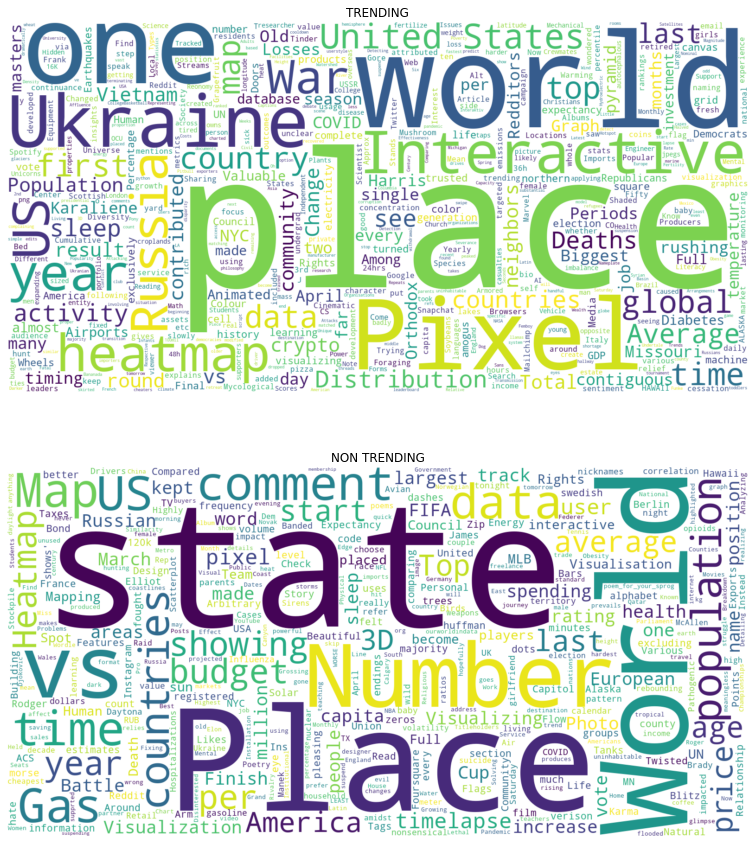

<Figure size 1440x1440 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(2, 1,figsize=(15,15))
plt.figure(figsize = (20,20))
stopwords = stop_words = [".","S", "U", "OC"] + list(STOPWORDS)
trending = WordCloud(min_font_size = 3,background_color="white",  max_words = 3000 , width = 1600 , height = 800 , stopwords = stopwords).generate(str(" ".join(data[data["is_trending"]==1].titles)))
# plt.imshow(trending,interpolation = 'bilinear')
axis[0].imshow(trending,interpolation = 'bilinear')
axis[0].set_title("TRENDING")
axis[0].axis("off")
non_trending = WordCloud(min_font_size = 3,background_color="white",  max_words = 3000 , width = 1600 , height = 800 , stopwords = stopwords).generate(str(" ".join(data[data["is_trending"]==0].titles)))
# plt.imshow(non_trending,interpolation = 'bilinear')
axis[1].imshow(non_trending,interpolation = 'bilinear')
axis[1].set_title("NON TRENDING")
axis[1].axis("off")


In [29]:
import requests
image_url=data.loc[0]["urls"]
img_data = requests.get(image_url).content
file_name = "scrapedimages\\"+str(0+2)+".png"
with open(file_name, 'wb') as handler:
    handler.write(img_data)

In [34]:
import requests
for i in range(len(data)):
    print(i)
    if(data.loc[i]["extension"]==".png"):
        image_url=data.loc[i]["urls"]
        img_data = requests.get(image_url).content
        file_name = str(i+2)+".png"
    with open(file_name, 'wb') as handler:
        handler.write(img_data)
        print(i)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
110
110
111
111
112
112
113
113
114
114
115
115
116
116
117
117
118
118
119
119
120
120
121
121
122
122
123
123
124
124
125
125
126
126
127
127
128
128
129
129
130
130
131
131
132
132
133
133
134
134
135
135
136
136
137
137
138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
147
147
148
148
149
149
150
150
151
151
152


In [32]:
for i in range(len(data)):
    if(data.loc[i]["extension"]==".jpeg" or data.loc[i]["extension"]==".jpg"):
        print(i)
        image_url=data.loc[i]["urls"]
        img_data = requests.get(image_url).content
        file_name = str(i+2)+".png"
    with open(file_name, 'wb') as handler:
        handler.write(img_data)

8
13
17
21
24
31
34
38
57
96
97
111
114
121
147


In [33]:
for i in range(len(data)):
    if(data.loc[i]["extension"]==".gif"):
        print(i)
        image_url=data.loc[i]["urls"]
        img_data = requests.get(image_url).content
        file_name = str(i+2)+".gif"
    with open(file_name, 'wb') as handler:
        handler.write(img_data)

113
144
155
156


In [35]:
data.columns


Index(['time_created', 'author_name', 'titles', 'text', 'total_votes',
       'upvotes', 'is_interactive', 'is_dynamic', 'is image downloaded',
       'urls', 'awards', 'total_awards', 'flairs', 'isoriginal',
       'isdistinguished', 'isselfpost', 'is_author_verified',
       'is_author_reddit_employee', 'author_has_reddit_premium',
       'author_link_karma', 'author_comment_karma', 'is_trending', 'extension',
       'type'],
      dtype='object')

In [36]:
data["downvotes"]=data['total_votes']-data["upvotes"]

In [37]:
data.to_csv("reddit_data_v1.csv")